# Uber Questions 25-28, 13-14 Solution

**Overview and Instructions:**

For questions 25-28 please use the "dataset_2.csv" dataset.

## Data Exploration

Let's start with reading and exploring the dataset. First, import pandas and numpy as always.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Then, read the dataset.

In [2]:
df = pd.read_csv('dataset_2.csv')
df.head(10)

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0
5,Alesha,7,100%,4,4.8
6,Alvaro,17,88%,11,4.6
7,Andra,16,94%,11,4.6
8,Augusta,19,84%,11,4.7
9,Aurora,10,90%,4,4.6


It seems we have a dataset that includes taxi driver statistics. Let's check if there is any null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             119 non-null    object 
 1   Trips Completed  119 non-null    int64  
 2   Accept Rate      119 non-null    object 
 3   Supply Hours     119 non-null    int64  
 4   Rating           119 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


We are very lucky! We have a full non-null dataframe. Only thing that we need to apply as data preprocessing is remove `%` symbol from `Accept Rate` column to be able to use its values in integer comparison. 

In [4]:
# convert accept rate to float from string to force conditions later
df['Accept Rate'] = df['Accept Rate'].apply(lambda x: float(x[:-1]))
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100.0,3,4.8
1,Abraham,12,83.0,5,4.7
2,Adelina,1,100.0,2,4.7
3,Akilah,1,100.0,2,4.9
4,Alec,21,76.0,11,5.0


Now, we will have some bar plots to observe statistics distribution over taxi drivers. We will define a function to use multiple times in plotting. This function will help us to put values on bar charts.

In [5]:
plt.rcParams["figure.figsize"] = (12,6)

def plot_counts(ax):

    for c in ax.containers:

        # Optional: if the segment is small or 0, customize the labels
        labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

        # remove the labels parameter if it's not needed for customized labels
        ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
    plt.ylabel("Count")
    plt.show()

Let's start to plot with Accept Rate. 

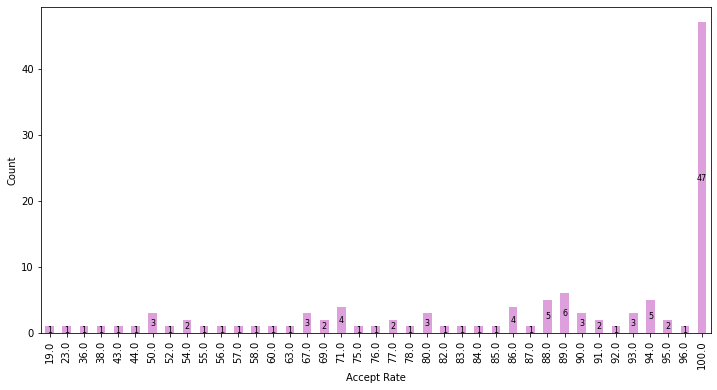

In [6]:
ax=df.groupby("Accept Rate")["Name"].count().reset_index().plot(
    kind='bar', stacked=False, x='Accept Rate', color='plum', legend=False)
plot_counts(ax)

Majority of taxi drivers have >95% accept rate. We will continue with ratings.

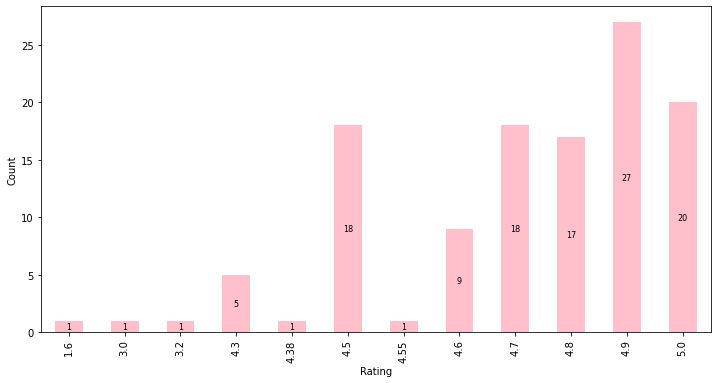

In [7]:
ax=df.groupby("Rating")["Name"].count().reset_index().plot(
    kind='bar', stacked=False, x='Rating', color='pink',legend=False)
plot_counts(ax)

There are just a few taxi drivers have a rating lower than 4.5.

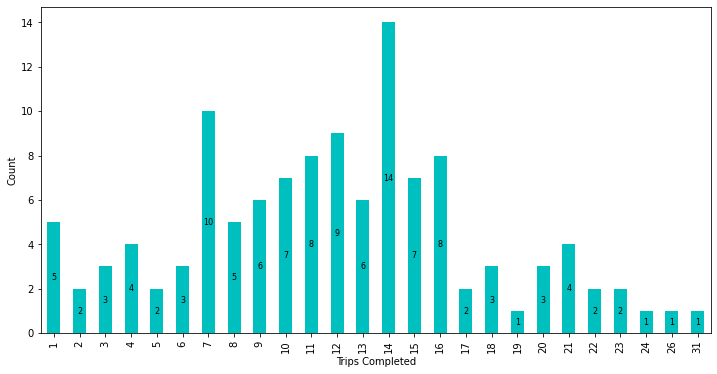

In [8]:
ax=df.groupby("Trips Completed")["Name"].count().reset_index().plot(
    kind='bar', stacked=False, x='Trips Completed', color='c', legend=False)
plot_counts(ax)

There is a wide range for completed trips. 

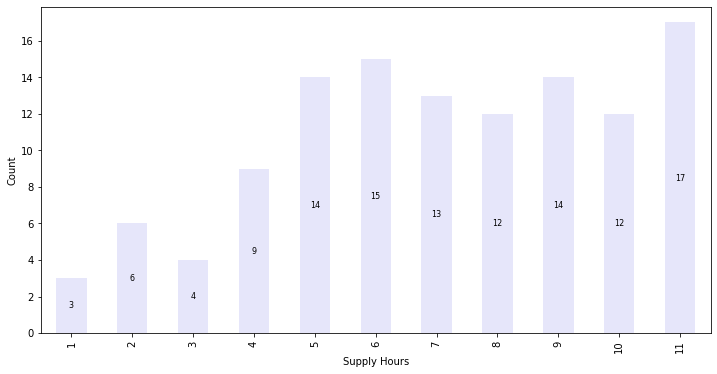

In [9]:
ax=df.groupby("Supply Hours")["Name"].count().reset_index().plot(
    kind='bar', stacked=False, x='Supply Hours', color='lavender',legend=False)
plot_counts(ax)

Most of the taxi drivers work more than 5 hours. Okay, now we can move forward with questions!

## QUESTION 25

It is going to be a huge Saturday and there will need to be many more cars on the road than last week. In order to get drivers to go online, we're assessing the following two bonus options in terms of cost.

**Option 1:** $50 for each driver that is online at least 8 hours, accept 90% of requests, completes 10 trips, and has a rating of 4.7 or better during the time frame.

**Option 2:** $4/ trip for all drivers complete 12 trips, and have a 4.7 or better rating.

How much would the total bonus payout with Option 1?

## SOLUTION 25

It is basic filtering! We will apply the conditions onto dataframe and see how many taxi drivers would fall under them.

In [10]:
# filter by given condition
first_option_df = df[(df['Supply Hours'] >= 8) & (df['Trips Completed'] >= 10) & 
                     (df['Accept Rate'] >= 90) & (df['Rating'] >= 4.7)]
first_option_df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
11,Byron,15,100.0,10,4.9
12,Carlota,14,100.0,8,5.0
19,Dannette,14,100.0,9,4.9
23,Demetrius,14,100.0,9,5.0
26,Dimple,15,100.0,10,4.9


Now, multiply row number with $50, the answer is there!

In [11]:
first_option_total_payout = 50 * len(first_option_df)
print('$'+str(first_option_total_payout))

$1050


## QUESTION 26

How much would the total bonus payout with option 2?

## SOLUTION 26

We will do the same filtering with different conditions. Apply them as given in the question statement.

In [12]:
# filter by given condition
second_option_df = df[(df['Trips Completed'] >= 12) & (df['Rating'] >= 4.7)]
second_option_df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
1,Abraham,12,83.0,5,4.7
4,Alec,21,76.0,11,5.0
8,Augusta,19,84.0,11,4.7
10,Buffy,13,54.0,6,5.0
11,Byron,15,100.0,10,4.9


Finally, multiply total completed trips for all drivers with $4. 

In [13]:
second_option_total_payout = 4 * second_option_df['Trips Completed'].sum()
print('$'+str(second_option_total_payout))

$2976


## QUESTION 27

How many drivers would qualify under Option 1 but not under Option 2?

## SOLUTION 27

To solve it, we can benefit from the indicator option of pandas merge, which is explained here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

We will set indicator to True and it will help us to identify each row is coming from which dataframe as left, right or both. We will merge on first option dataset with left setting. It means the drivers would qualify under Option 1 but not under Option 2 will have `left_only` indicator.

In [14]:
# merge all and see if both dataset includes the driver from _merge column
df_all = first_option_df.merge(second_option_df, on=first_option_df.columns.to_list(), 
                   how='left', indicator=True)
df_all

,Name,Trips Completed,Accept Rate,Supply Hours,Rating,_merge
0,Byron,15,100.0,10,4.9,both
1,Carlota,14,100.0,8,5.0,both
2,Dannette,14,100.0,9,4.9,both
3,Demetrius,14,100.0,9,5.0,both
4,Dimple,15,100.0,10,4.9,both
5,Emil,12,100.0,9,5.0,both
6,Garth,15,100.0,10,5.0,both
7,Hanh,14,94.0,9,4.9,both
8,Keshia,20,100.0,11,4.8,both
9,Latonia,13,100.0,9,5.0,both


In [15]:
# included by only option 1
df_all[df_all["_merge"] == 'left_only']

,Name,Trips Completed,Accept Rate,Supply Hours,Rating,_merge
16,Oren,11,91.0,9,4.8,left_only
17,Phyllis,10,90.0,8,4.8,left_only


## QUESTION 28

What percentages of drivers online completed less than 10 trips, had an acceptance rate of less than 90%, and had a rating of 4.7 or higher?

## SOLUTION 28

First we find the driver count who follows the conditions that are given in the question statement by using filtering.

In [16]:
# filter with given condition
less_trips_df = df[(df['Trips Completed'] < 10) & (df['Accept Rate'] < 90) & (df['Rating'] >= 4.7)]
less_trips_df

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
17,Cris,7,71.0,5,5.0
18,Dalila,7,57.0,2,4.8
20,Dannielle,3,67.0,5,5.0
22,Delfina,4,50.0,3,4.7
27,Domenica,9,89.0,5,4.9
36,Floyd,3,67.0,1,4.8
41,Hee,9,89.0,7,4.7
45,Ingrid,7,43.0,4,4.8
66,Lilla,9,89.0,8,4.7
67,Loree,9,89.0,8,4.7


Then, we will calculate the percentage by its ratio to all drivers count in whole dataframe.

In [17]:
print(str(len(less_trips_df) / len(df) * 100)+"%")

10.92436974789916%


## QUESTION 13

**Partner Business Modelling**

_This question worths is double points_

Please use the information below and the one that follows:

A taxi driver currently generates $200 per day in fares (before expenses), works six days a week, takes three weeks off and has the following expenses:

- Gas 200 USD per week
- Insurance 400 USD per month
- Vehicle rent (by the week) 500 USD

The driver doesn't pay gas and rent expenses on off weeks. 

**How much money (after expenses) does the driver make per year?**

## SOLUTION 13

Let's put all variables into math. There are 52 weeks per year and each year driver takes 3 weeks off. We will multiply weekly expenses by 49 months then. There is a montly expense that we need to multiply with total months per year, which is 12. This will form the expenses part. 

In [18]:
total_weeks_per_year = 52
weeks_off = 3
fare_per_day = 200 
workday_per_week = 6
total_months_per_year = 12
# expenses
gas_per_week = 200
insurance_per_month = 400
vehicle_rent_by_week = 500

In [19]:
total_expenses = (gas_per_week + vehicle_rent_by_week) * (total_weeks_per_year - weeks_off) + insurance_per_month * total_months_per_year
print("$"+str(total_expenses))

$39100


For revenues part, there are 6 workdays in a week. So, we will multiply fare per day with 6 and then 49 weeks for all year.  

In [20]:
total_revenue = (total_weeks_per_year - weeks_off) * workday_per_week * fare_per_day
print("$"+str(total_revenue))

$58800


Finally, deduct all expenses from total revenue to calculate how much money does the driver make per year.

In [21]:
print("$"+str(total_revenue - total_expenses))

$19700


## QUESTION 14

**Partner Business Modelling**

_This question worths is double points_

You are convincing the same driver above to buy a Town Car and partner with Uber.

If he does, his gas expenses would go up by 5%, his insurance expense would decrease by 20%, and he would no longer be renting a vehicle.

However, he would need to buy a car. Assuming the new car is 40000 USD, how much would the driver's gross fares need to increase per week to fully pay the car in year 1?

## SOLUTION 14

To find the increase that needs to be applied on fares, we need to calculate the total difference caused by given reasons. Let's start with calculating the difference caused by new insurance, gas , and car price. The taxi driver won't pay vehicle rent per week anymore. After finding the taxi driver's total expense increase we will divide it to total working days and find the needed fare increase.

In [22]:
# calculate the difference caused by new insurance, gas , and car price
gas_per_week = gas_per_week * 0.05
insurance_per_month = insurance_per_month * -0.2
new_car = 40000

new_total_expenses = new_car + (gas_per_week - vehicle_rent_by_week) * (total_weeks_per_year - weeks_off) + insurance_per_month * total_months_per_year
fare_increase = new_total_expenses / ((total_weeks_per_year - weeks_off) * workday_per_week)
print("$"+str(fare_increase))

$51.12244897959184
